In [2]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import math


mnist=input_data.read_data_sets('.', one_hot=True, reshape=False)
epochs=10000
batch_size=512
learning_rate=0.001
drop_out=0.75
display_step=250

train_features=mnist.train.images
valid_features=mnist.validation.images
test_features=mnist.test.images

train_labels=mnist.train.labels.astype(np.float32)
valid_labels=mnist.validation.labels.astype(np.float32)
test_labels=mnist.test.labels.astype(np.float32)



x=tf.placeholder(tf.float32, [None, 28, 28, 1])
labels=tf.placeholder(tf.float32, [None, 10])
keep_prob=tf.placeholder(tf.float32)

weights={'c1':tf.Variable(tf.random_normal([5,5,1,32], name='weightsC1')),
        'c2':tf.Variable(tf.random_normal([5,5,1,64], name='weightsC2')),
        'fc':tf.Variable(tf.random_normal([7*7*64, 1024], name='weightsFc')),
        'out':tf.Variable(tf.random_normal([1024,10], name='weightsOut'))}

biases={'c1':tf.Variable(tf.random_uniform([32], name='biasC1')),
       'c2':tf.Variable(tf.random_uniform([64]), name='biasC1'),
       'fc':tf.Variable(tf.random_uniform([1024], name='biasFc')),
       'out':tf.Variable(tf.random_uniform([10], name='biasOut'))}

def conv2d(x, w, b):
    layer=tf.nn.conv2d(x, w, strides=[1,2,2,1], padding='SAME')
    layer=tf.nn.bias_add(layer, b)
    return tf.nn.relu(layer)

def maxPool(layer):
    return tf.nn.max_pool(layer, ksize=[1,2,2,1], strides=[1,2,2,1, ], padding="SAME")

def model(x, weights,biases, drop_out):
    layer1=conv2d(x, weights['c1'], biases['c1'] )
    layer1=maxPool(layer1)
    layer2=conv2d(x, weights['c2'], biases['c2'])
    layer2=maxPool(layer2)
    
    fcLayer=tf.reshape(layer2, [-1, weights['fc'].get_shape().as_list()[0]])
    fcLayer=tf.add(tf.matmul(fcLayer, weights['fc']), biases['fc'])
    fcLayer=tf.nn.relu(fcLayer)
    fcLayer=tf.nn.dropout(fcLayer, drop_out)
    outLayer=tf.add(tf.matmul(fcLayer, weights['out']), biases['out'])
    return outLayer
    

logits=model(x, weights, biases, keep_prob)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred=tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy=tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init=tf.global_variables_initializer()
save_file='./digit_classifierModel.ckpt'
saver=tf.train.Saver()

def get_batches(batch_size, features, labels):
    out_batches=[]
    for start in range(0, len([features]), batch_size):
        end=start+batch_size
        batches=[features[start:end], labels[start:end]]
        out_batches.append(batches)
    return out_batches

def epoch_stats(sess, epoch, last_feat, last_lab):
    cur_cost=sess.run(cost, feed_dict={x:last_feat, labels:last_lab, keep_prob:1.0})
    cur_acc=sess.run(accuracy, feed_dict={x:valid_features[:2000], labels:valid_labels[:2000], keep_prob:1.0})
    print('epoch : {:<4} - cost : {:<8.3} - acc: {:<5.3}'.format(epoch, cur_cost, cur_acc) )
    

with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        for batch_features, batch_labels in get_batches(batch_size, train_features, train_labels):
            sess.run(optimizer, feed_dict={x:batch_features, labels:batch_labels, keep_prob:drop_out})
        if (i%display_step==0):
         
            epoch_stats(sess, i, batch_features, batch_labels)
        
    model_acc=sess.run(accuracy, feed_dict={x:test_features, labels:test_labels, keep_prob:1.0})
    saver.save(sess, save_file)
    
    
print('\nModel accuracy - {}'.format(model_acc))




Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
epoch : 0    - cost : 2.75e+03 - acc: 0.0885
epoch : 250  - cost : 6.51     - acc: 0.794
epoch : 500  - cost : 0.0      - acc: 0.813
epoch : 750  - cost : 0.0      - acc: 0.824
epoch : 1000 - cost : 0.0      - acc: 0.834
epoch : 1250 - cost : 0.0      - acc: 0.84 
epoch : 1500 - cost : 0.0      - acc: 0.841
epoch : 1750 - cost : 0.0      - acc: 0.845
epoch : 2000 - cost : 0.0      - acc: 0.846
epoch : 2250 - cost : 0.0      - acc: 0.848
epoch : 2500 - cost : 0.0      - acc: 0.85 
epoch : 2750 - cost : 0.0      - acc: 0.85 
epoch : 3000 - cost : 0.0      - acc: 0.852
epoch : 3250 - cost : 0.0      - acc: 0.852
epoch : 3500 - cost : 0.0      - acc: 0.855
epoch : 3750 - cost : 0.0      - acc: 0.856
epoch : 4000 - cost : 0.0      - acc: 0.856
epoch : 4250 - cost : 0.0      - acc: 0.856
epoch : 4500 - cost : 0.0      - acc: 0.857
epoch

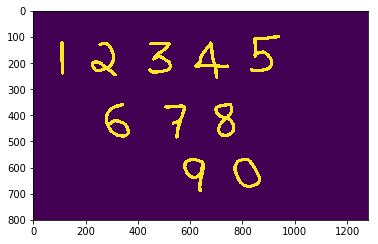


---Extracted Digits---



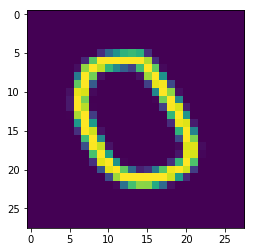

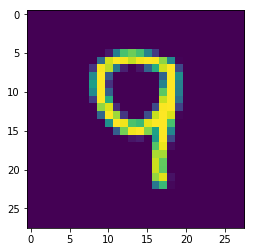

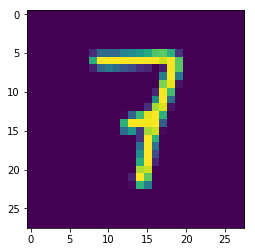

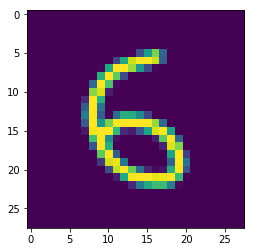

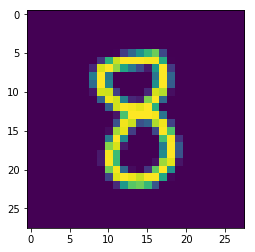

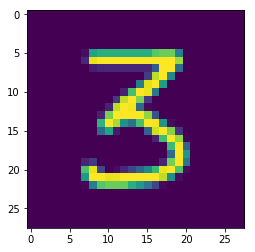

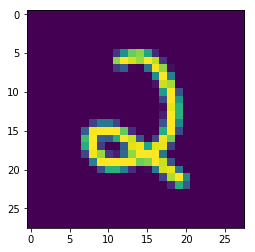

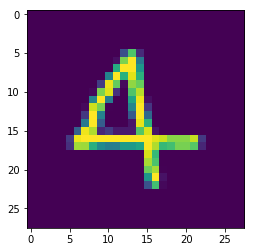

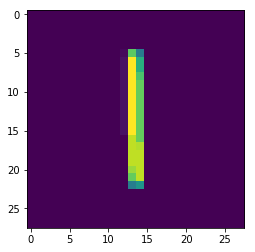

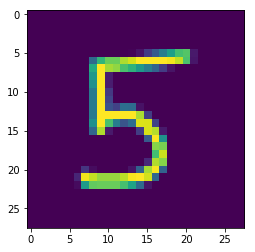

INFO:tensorflow:Restoring parameters from ./digit_classifierModel.ckpt

-----DETECTED DIGITS (as per above order)----

[0 8 2 6 8 3 2 4 1 5]


In [3]:
# Test User input

import cv2
from matplotlib import pyplot as plt



im = cv2.imread('finalDigits.jpeg') #input file here
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)
_,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

numbers=[]
pred_numbers=[]
plt.imshow(im_th)
plt.show()
print("\n---Extracted Digits---\n")

for rect in rects:
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    plt.imshow(roi)
    plt.show()
    roi=roi[:, :, np.newaxis]
    numbers.append(roi)
    

with tf.Session() as sess:
    saver.restore(sess, save_file)
    pred_numbers.append(sess.run(tf.argmax(logits, 1), feed_dict={x:numbers, keep_prob:1.0}))
    
print("\n-----DETECTED DIGITS (as per above order)----\n")
for i in pred_numbers: print(i,)